# Introduccion to pandas

Pandas es una biblioteca de Python que proporciona una colección de estructuras de datos potentes para ayudarlo a administrar los datos. Estos objetos tienen una fuerte integración con NumPy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Con pandas, es fácil almacenar, visualizar y realizar cálculos en sus datos. Con solo unas pocas líneas de código, podemos modificar nuestros datos y presentarlos de una manera fácil de entender. Aquí simulamos algunos retornos en NumPy, los colocamos en un DataFrame de pandas y realizamos cálculos para convertirlos en precios y trazarlos, todos usando solo unas pocas líneas de código.

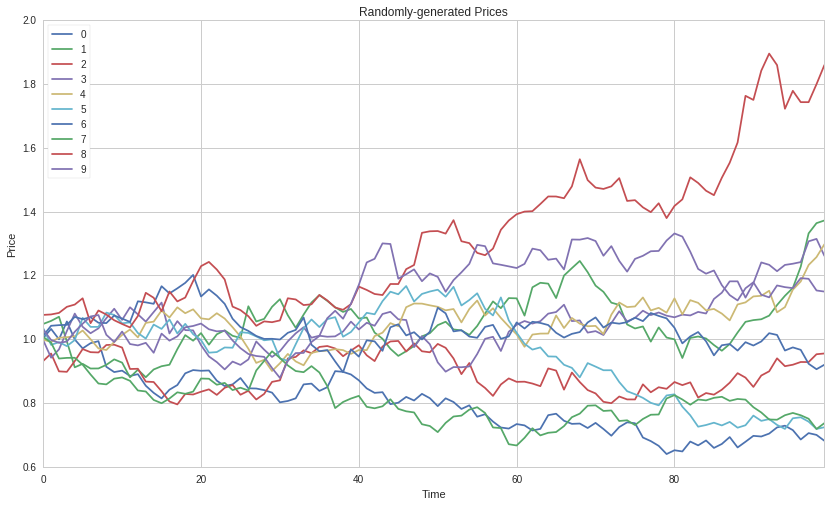

In [3]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

## Estructuras de datos en pandas

### `Series`

Un pandas `Series` es un arreglo 1-dimensional  con etiquetas que pueden contener cualquier tipo de datos. Principalmente los usamos para manejar datos de series temporales.

In [4]:
s = pd.Series([1, 2, np.nan, 4, 5])
print s

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Cada serie tiene un nombre. Podemos darle a la serie un nombre como parámetro o podemos definirlo luego accediendo directamente al atributo de nombre. En este caso, le hemos dado a nuestra serie de tiempo ningún nombre por lo que el atributo debe estar vacío.

In [5]:
print s.name

None


In [6]:
s.name = "Toy Series"
print s.name

Toy Series


In [7]:
print s.index

RangeIndex(start=0, stop=5, step=1)



pandas tiene una función incorporada específicamente para crear índices de fecha, `date_range ()`. Usamos la función aquí para crear un nuevo índice para `s`.

In [8]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print new_index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


Un índice debe tener exactamente la misma longitud que la propia serie. Cada índice debe coincidir uno a uno con cada elemento de la Serie. Una vez que esto esté satisfecho, podemos modificar directamente el índice de la serie, como con el nombre, para usar nuestro índice nuevo y más informativo.

In [9]:
s.index = new_index
print s.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


El índice de la serie es crucial para el manejo de series temporales, que veremos un poco más adelante.

#### Accediendo a los elementos de la  `Serie`

Las `Series` son accedidas usando los metodos `iloc[]` y `loc[]` methods. Se usa `iloc[]` para acceder a los elementos por indices enteros y se usa `loc[]` para acceder al indice de la serie

In [9]:
print "First element of the series: ", s.iloc[0]
print "Last element of the series: ", s.iloc[len(s)-1]

First element of the series:  1.0
Last element of the series:  5.0


In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

Al crear un segmento, tenemos la opción de especificar un principio, un final y un paso. El segmento comenzará en el índice de inicio y dará los pasos de paso de tamaño hasta que pase el índice final, sin incluir el final.

In [11]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

In [13]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64


También podemos acceder a una serie usando los valores de su índice. Dado que indexamos s con una colección de fechas  podemos ver el valor contenido en s para una fecha determinada.

In [15]:
s.loc['2016-01-01']

1.0

In [16]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

Con Series, podemos usar los corchetes ([]) para acceder a los elementos, pero esta no es la mejor práctica. Los corchetes son ambiguos porque se pueden usar para acceder a Series (y DataFrames) usando valores de índice y de valores enteros, y los resultados cambiarán en función del contexto (especialmente con DataFrames).

## Indización Booleana


Además de los métodos de acceso mencionados anteriormente, puede filtrar `Series` usando matrices booleanas. `Series` son compatibles con sus comparadores estándar. Una vez que se compara con la condición que desee, recupera otra `Serie`, esta vez llena de valores booleanos.

In [17]:
print s < 3

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool



Podemos volver a pasar esta serie a la serie original para filtrar solo los elementos para los cuales nuestra condición es verdadera.

In [18]:
print s.loc[s < 3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


In [19]:
print s.loc[(s < 3) & (s > 1)]

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


#### Serie de indización y tiempo


Dado que usamos `Series` para manejar series de tiempo, vale la pena cubrir un poco de cómo manejamos el componente de tiempo. Para nuestros propósitos usamos pandas `Timestamp` objetos. Vamos a sacar una serie de tiempo completo, completa con todas las etiquetas apropiadas, utilizando nuestro método `get_pricing ()`. Todos los datos extraídos con `get_pricing ()` o utilizando nuestra API Pipeline estarán en formato `Serie` o` DataFrame`. Podemos modificar este índice como queramos.


In [20]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")

Podemos mostrar los primeros elementos de nuestra serie utilizando el método head() y especificando la cantidad de elementos que queremos. El método análogo para los últimos elementos es tail().

In [21]:
print "\n", type(prices)
prices.head(5) 


<class 'pandas.core.series.Series'>


2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: Equity(28016 [CMG]), dtype: float64

In [22]:
print 'Old name: ', prices.name
prices.name = symbol
print 'New name: ', prices.name

Old name:  Equity(28016 [CMG])
New name:  CMG


Echemos un vistazo más de cerca al `DatetimeIndex` de nuestra serie temporal de` precios`.

In [25]:
print prices.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns, UTC]', length=1006, freq='C')


Tenga en cuenta que este `DatetimeIndex` tiene una colección de información asociada. En particular, tiene una frecuencia asociada (`freq`) y una zona horaria asociada (` tz`). La frecuencia indica si los datos son diarios frente a mensuales frente a algún otro período, mientras que la zona horaria indica en qué entorno local se relaciona este índice. ¡Podemos modificar toda esta información adicional!

Si volvemos a muestrear nuestra `Serie`, podemos ajustar la frecuencia de nuestros datos. Actualmente tenemos datos diarios (sin incluir los fines de semana) porque `get_pricing ()` extrae solo datos de días de mercado. Vamos a aumentar la muestra de estos datos diarios a datos mensuales usando el método `resample ()`.

In [29]:
monthly_prices = prices.resample('M')
monthly_prices.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  


2012-01-31 00:00:00+00:00    354.812100
2012-02-29 00:00:00+00:00    379.582000
2012-03-31 00:00:00+00:00    406.996182
2012-04-30 00:00:00+00:00    422.818500
2012-05-31 00:00:00+00:00    405.811091
2012-06-30 00:00:00+00:00    403.068571
2012-07-31 00:00:00+00:00    353.849619
2012-08-31 00:00:00+00:00    294.516522
2012-09-30 00:00:00+00:00    326.566316
2012-10-31 00:00:00+00:00    276.545333
Freq: M, Name: CMG, dtype: float64

El método `resample ()` utiliza de manera predeterminada la media de los datos de nivel inferior para crear los datos de nivel superior. Podemos especificar de qué otra manera podemos querer que se calcule el up-sampling especificando el parámetro `how`.

In [27]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


2012-01-31 00:00:00+00:00    355.380
2012-02-29 00:00:00+00:00    378.295
2012-03-31 00:00:00+00:00    408.850
2012-04-30 00:00:00+00:00    420.900
2012-05-31 00:00:00+00:00    405.390
2012-06-30 00:00:00+00:00    402.790
2012-07-31 00:00:00+00:00    380.370
2012-08-31 00:00:00+00:00    295.380
2012-09-30 00:00:00+00:00    332.990
2012-10-31 00:00:00+00:00    286.440
Freq: M, Name: CMG, dtype: float64

Incluso podemos especificar cómo queremos que se realice el cálculo del nuevo período. Aquí creamos una función `custom_resampler ()` que devolverá el primer valor del período. En nuestro caso específico, esto devolverá una `Serie` donde el valor mensual es el primer valor de ese mes.

In [30]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


2012-01-31 00:00:00+00:00    340.98
2012-02-29 00:00:00+00:00    370.84
2012-03-31 00:00:00+00:00    394.58
2012-04-30 00:00:00+00:00    418.65
2012-05-31 00:00:00+00:00    419.78
2012-06-30 00:00:00+00:00    397.14
2012-07-31 00:00:00+00:00    382.97
2012-08-31 00:00:00+00:00    280.60
2012-09-30 00:00:00+00:00    285.91
2012-10-31 00:00:00+00:00    316.13
Freq: M, Name: CMG, dtype: float64

También podemos ajustar la zona horaria de una `Serie` para adaptar el tiempo de los datos del mundo real. En nuestro caso, nuestra serie temporal ya está localizada en UTC, pero digamos que queremos ajustar la hora para que sea 'US / Eastern'. En este caso, usamos el método `tz_convert ()`, ya que la hora ya está localizada.

In [31]:
eastern_prices = prices.tz_convert('US/Eastern')
eastern_prices.head(10)

2012-01-02 19:00:00-05:00    340.980
2012-01-03 19:00:00-05:00    348.740
2012-01-04 19:00:00-05:00    349.990
2012-01-05 19:00:00-05:00    348.950
2012-01-08 19:00:00-05:00    339.522
2012-01-09 19:00:00-05:00    340.700
2012-01-10 19:00:00-05:00    347.330
2012-01-11 19:00:00-05:00    347.830
2012-01-12 19:00:00-05:00    354.390
2012-01-16 19:00:00-05:00    353.610
Freq: C, Name: CMG, dtype: float64

Además de la capacidad de gestión de zona horaria y frecuencia, cada serie de tiempo tiene incorporado un método `reindex ()` que podemos usar para realinear los datos existentes de acuerdo con un nuevo conjunto de etiquetas de índice. Si no existen datos para una etiqueta en particular, los datos se llenarán con un valor de marcador de posición. Esto es típicamente `np.nan`, aunque podemos proporcionar un método de relleno.

Los datos que `get_pricing ()` solo incluyen días de mercado. Pero, ¿y si queremos precios para cada día calendario? Esto incluirá vacaciones y fines de semana, momentos en los que normalmente no puede negociar acciones. Primero, creemos un nuevo `DatetimeIndex` que contenga todo lo que queramos.

In [32]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print calendar_dates

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-23', '2015-12-24', '2015-12-25', '2015-12-26',
               '2015-12-27', '2015-12-28', '2015-12-29', '2015-12-30',
               '2015-12-31', '2016-01-01'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


In [33]:
calendar_prices = prices.reindex(calendar_dates, method='ffill')
calendar_prices.head(15)

2012-01-01 00:00:00+00:00        NaN
2012-01-02 00:00:00+00:00        NaN
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
2012-01-13 00:00:00+00:00    354.390
2012-01-14 00:00:00+00:00    354.390
2012-01-15 00:00:00+00:00    354.390
Freq: D, Name: CMG, dtype: float64

#### Datos perdidos

Cada vez que manejamos datos reales, hay una posibilidad muy real de encontrar valores perdidos. Los datos reales están plagados de agujeros y los pandas nos proporcionan formas de manejarlos. A veces, el remuestreo o reindexación puede crear valores `NaN`. Afortunadamente, los pandas nos proporcionan formas de manejarlos. Tenemos dos medios principales para hacer frente a los datos que faltan. El primero de ellos es completar los datos faltantes con `fillna ()`. Por ejemplo, supongamos que queremos completar los días faltantes con el precio medio de todos los días.

In [34]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

2012-01-01 00:00:00+00:00    501.05836
2012-01-02 00:00:00+00:00    501.05836
2012-01-03 00:00:00+00:00    340.98000
2012-01-04 00:00:00+00:00    348.74000
2012-01-05 00:00:00+00:00    349.99000
2012-01-06 00:00:00+00:00    348.95000
2012-01-07 00:00:00+00:00    348.95000
2012-01-08 00:00:00+00:00    348.95000
2012-01-09 00:00:00+00:00    339.52200
2012-01-10 00:00:00+00:00    340.70000
Freq: D, Name: CMG, dtype: float64


Usar `fillna ()` es bastante fácil. Solo se trata de indicar el valor con el que desea llenar los espacios.

En lugar de completar los valores específicos, podemos usar el parámetro `method`, de forma similar a cómo funciona el método` reindex () `. Podríamos usar "relleno hacia atrás", donde `NaN`s están llenos con el *next* valor lleno (en lugar del *last* del envío adelantado) como sigue:


In [35]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

2012-01-01 00:00:00+00:00    340.980
2012-01-02 00:00:00+00:00    340.980
2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
Freq: D, Name: CMG, dtype: float64

Pero, de nuevo, esta es una mala idea por las mismas razones que la opción anterior. Ambas soluciones conocidas tienen en cuenta * datos futuros * que no estaban disponibles en el momento de los puntos de datos que intentamos llenar. En el caso de utilizar la media o la mediana, estas estadísticas de resumen se calculan teniendo en cuenta toda la serie temporal. El relleno hacia atrás equivale a decir que el precio de un valor en particular hoy, en este momento, el precio de mañana. Esto tampoco tiene sentido. Estas dos opciones son ejemplos de sesgo de anticipación, el uso de datos que serían desconocidos o no estarían disponibles en el momento deseado, y deberían evitarse.

Nuestra próxima opción es significativamente más atractiva. Simplemente podríamos soltar los datos faltantes utilizando el método `dropna ()`. Esta es una alternativa mucho mejor que llenar los valores `NaN` con números arbitrarios.

In [36]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-07 00:00:00+00:00    348.950
2012-01-08 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
2012-01-10 00:00:00+00:00    340.700
2012-01-11 00:00:00+00:00    347.330
2012-01-12 00:00:00+00:00    347.830
Freq: D, Name: CMG, dtype: float64


Ahora nuestra serie de tiempo se limpia para el año calendario, con todos nuestros valores NaN correctamente manejados. Es hora de hablar sobre cómo hacer análisis de series de tiempo con estructuras de datos de pandas.

### Análisis de series temporales con pandas

Hagamos un análisis básico de series de tiempo sobre nuestros precios originales. Cada pandas `Serie` tiene un método de trazado incorporado.

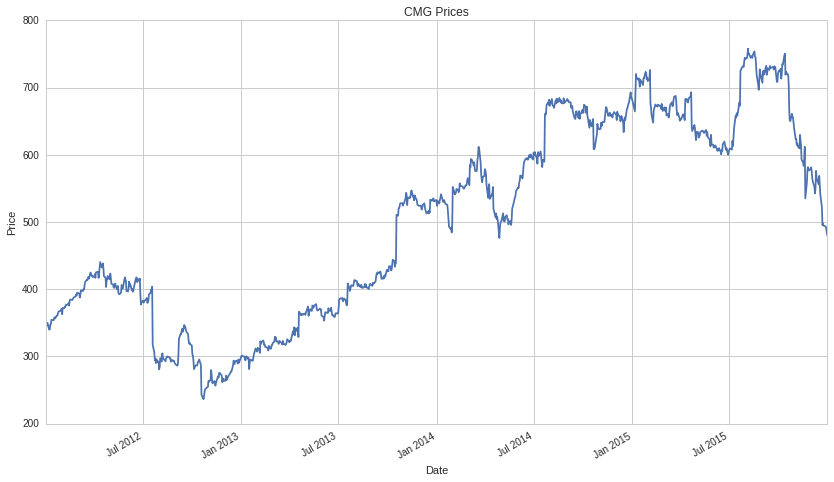

In [37]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");


Además de algunas estadísticas descriptivas integradas. Podemos calcularlos individualmente o usando el método `describe ()`.

In [38]:
print "Mean: ", prices.mean()
print "Standard deviation: ", prices.std()

Mean:  501.637439364
Standard deviation:  146.697204146


In [39]:
print "Summary Statistics"
print prices.describe()

Summary Statistics
count    1006.000000
mean      501.637439
std       146.697204
min       236.240000
25%       371.605000
50%       521.280000
75%       646.753750
max       757.770000
Name: CMG, dtype: float64



Podemos modificar fácilmente `Serie` con escalares utilizando nuestros operadores matemáticos básicos.

In [40]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

2012-01-03 00:00:00+00:00    671.960
2012-01-04 00:00:00+00:00    687.480
2012-01-05 00:00:00+00:00    689.980
2012-01-06 00:00:00+00:00    687.900
2012-01-09 00:00:00+00:00    669.044
Freq: C, Name: CMG, dtype: float64


Y podemos crear combinaciones lineales de `Series` usando los operadores matemáticos básicos. pandas agrupará índices coincidentes y realizará los cálculos elemento para producir una nueva `Serie`.

In [41]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

2012-01-03 00:00:00+00:00    323.096269
2012-01-04 00:00:00+00:00    371.844867
2012-01-05 00:00:00+00:00    398.265542
2012-01-06 00:00:00+00:00    348.902218
2012-01-09 00:00:00+00:00    316.200737
Freq: C, dtype: float64

Sin embargo, si no hay índices que concuerden, podemos obtener una `Serie` vacía a cambio.

In [42]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

2012-01-03 00:00:00+00:00   NaN
2012-01-04 00:00:00+00:00   NaN
2012-01-05 00:00:00+00:00   NaN
2012-01-06 00:00:00+00:00   NaN
2012-01-09 00:00:00+00:00   NaN
dtype: float64

En lugar de mirar una serie temporal en sí misma, es posible que deseemos ver sus diferencias de primer orden o cambio porcentual (para obtener retornos adicionales o multiplicativos, en nuestro caso particular). Ambos son métodos integrados.

In [43]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

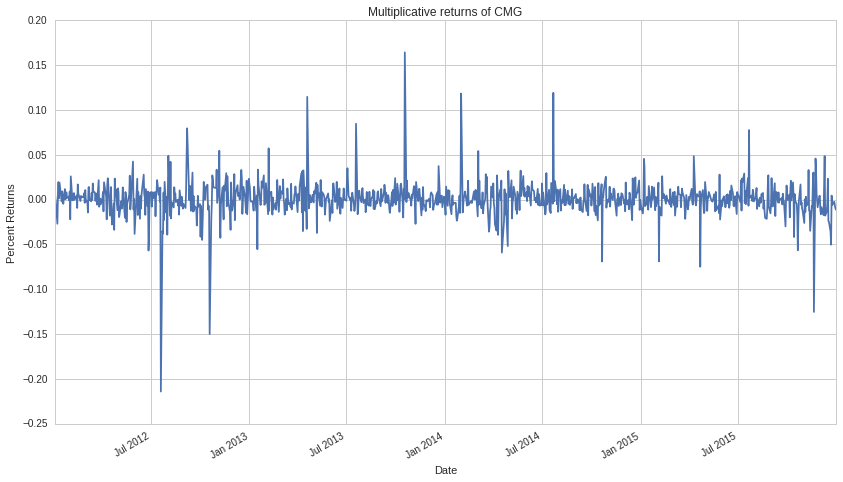

In [44]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

In [45]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.name = "30-day rolling mean"

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


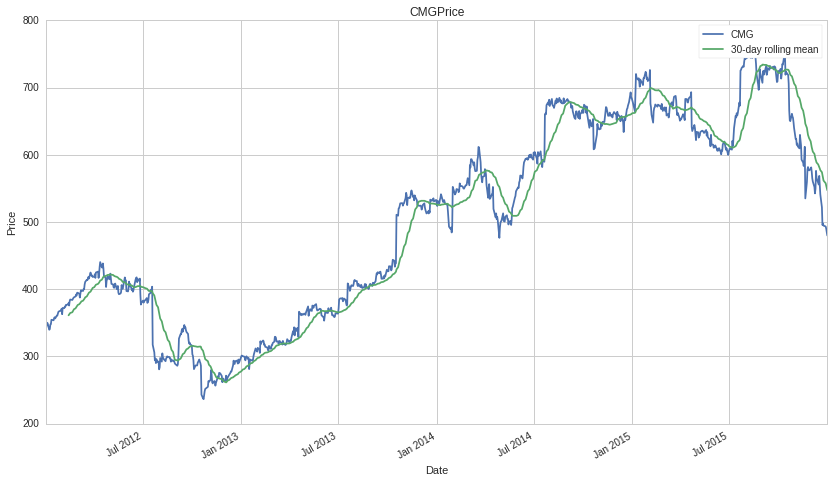

In [46]:
prices.plot()
rolling_mean.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [47]:
rolling_std = pd.rolling_std(prices, 30)
rolling_std.name = "30-day rolling volatility"

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  """Entry point for launching an IPython kernel.


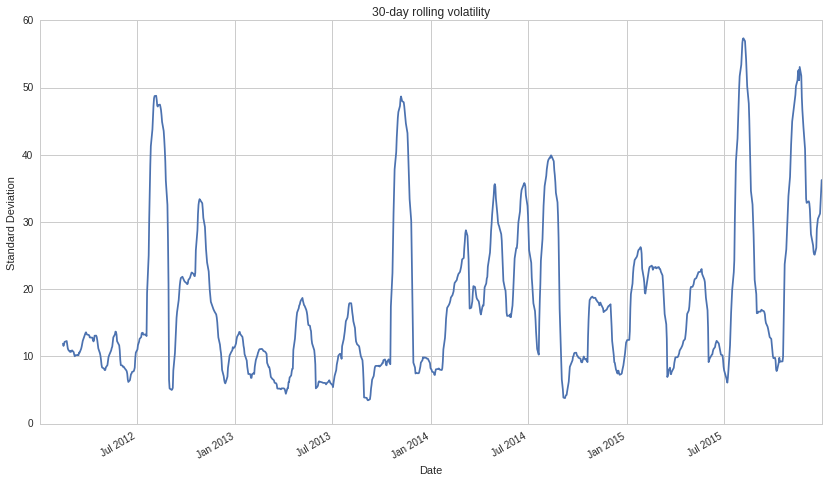

In [48]:
rolling_std.plot()
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

In [49]:
print np.median(mult_returns)

0.000160446683567


La mayoría de estas funciones, sin embargo, ya están implementadas directamente como métodos `Series` y` DataFrame`.

In [50]:
print mult_returns.median()

0.000160446683567


### `DataFrames`


Muchos de los aspectos del trabajo con `Series` se transfieren a` DataFrames`. pandas `DataFrames` nos permiten administrar fácilmente nuestros datos con su estructura intuitiva.

Podemos crear un `DataFrame` llamando` pandas.DataFrame () `en un diccionario o NumPy` ndarray`. También podemos concatenar un grupo de pandas `Series` en un` DataFrame` usando `pandas.concat ()`.

In [51]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print dict_data

{'a': [1, 2, 3, 4, 5], 'c': array([-0.3651589 ,  0.67508608,  0.11418808,  1.14594822,  0.2664427 ]), 'b': ['L', 'K', 'J', 'M', 'Z']}


Cada `DataFrame` tiene algunos atributos clave que debemos tener en cuenta. El primero de ellos es el atributo de índice. Podemos incluir fácilmente un índice de objetos `Timestamp` como lo hicimos con` Series`.

In [52]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print frame_data

            a  b         c
2016-01-01  1  L -0.365159
2016-01-02  2  K  0.675086
2016-01-03  3  J  0.114188
2016-01-04  4  M  1.145948
2016-01-05  5  Z  0.266443



Como se mencionó anteriormente, podemos combinar `Series` en` DataFrames`. Concatenar la `Serie` así coincidirá con los elementos según su índice correspondiente. Como las siguientes `Series` no tienen un índice asignado, cada una de ellas se predetermina a un índice entero.

In [53]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print numbers

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


Usaremos `pandas.concat ()` de nuevo más tarde para combinar múltiples `DataFrame`s en uno.

Cada `DataFrame` también tiene un atributo` columns`. Estos pueden ser asignados cuando llamamos `pandas.DataFrame` o pueden ser modificados directamente como el índice. Tenga en cuenta que cuando concatenamos las dos `Series` de arriba, los nombres de las columnas eran los nombres de esas` Series`.

In [54]:
print numbers.columns

Index([u'Evens', u'Odds'], dtype='object')


Para modificar las columnas después de la creación del objeto, solo necesitamos hacer lo siguiente:

In [55]:
numbers.columns = ['Shmevens', 'Shmodds']
print numbers

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


En la misma línea, el índice de un `DataFrame` se puede cambiar después del hecho.

In [56]:
print numbers.index

RangeIndex(start=0, stop=5, step=1)


In [57]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print numbers

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separados de las columnas y del índice de un `DataFrame`, también podemos acceder directamente a los valores que contienen mirando el atributo de valores.

In [58]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

Esto retorna un arreglo Numpy

In [59]:
type(numbers.values)

<type 'numpy.ndarray'>

### Accediendo a los elementos de un DataFrame

De nuevo, vemos mucha transferencia de `Series` en la forma en que accedemos a los elementos de` DataFrames`. El punto clave aquí es que todo tiene que tener en cuenta las múltiples dimensiones ahora. La principal forma de que esto ocurra es a través del acceso de las columnas de un `DataFrame`, ya sea individualmente o en grupos. Podemos hacer esto accediendo directamente a los atributos o utilizando los métodos con los que ya estamos familiarizados.

In [60]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = get_pricing(symbol, start_date=start, end_date=end, fields="price")
if isinstance(symbol, list):
    prices.columns = map(lambda x: x.symbol, prices.columns)
else:
    prices.name = symbol

Aquí accedemos directamente a la columna `CMG`. Tenga en cuenta que este estilo de acceso solo funcionará si el nombre de su columna no tiene espacios ni caracteres hostiles.

In [61]:
prices.CMG.head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

También podemos usar `loc []` para acceder a una columna individual como tal.

In [62]:
prices.loc[:, 'CMG'].head()

2012-01-03 00:00:00+00:00    340.980
2012-01-04 00:00:00+00:00    348.740
2012-01-05 00:00:00+00:00    349.990
2012-01-06 00:00:00+00:00    348.950
2012-01-09 00:00:00+00:00    339.522
Freq: C, Name: CMG, dtype: float64

Acceder a una columna individual devolverá una `Serie`, independientemente de cómo lo obtengamos.

In [63]:
print type(prices.CMG)
print type(prices.loc[:, 'CMG'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Observe cómo pasamos una tupla en el método `loc []`? Esta es una diferencia clave entre el acceso a una `Serie` y el acceso a` DataFrame`, basado en el hecho de que `DataFrame` tiene múltiples dimensiones. Cuando pasa una tupla bidimensional a un `DataFrame`, el primer elemento de la tupla se aplica a las filas y el segundo se aplica a las columnas. Por lo tanto, para descomponerlo, la línea de código anterior le dice al `DataFrame` que devuelva cada fila de la columna con la etiqueta`'GMG'`. Las listas de columnas también son compatibles.

In [64]:
prices.loc[:, ['CMG', 'MCD']].head()

,CMG,MCD
2012-01-03 00:00:00+00:00,340.980,86.631
2012-01-04 00:00:00+00:00,348.740,87.166
2012-01-05 00:00:00+00:00,349.990,87.526
2012-01-06 00:00:00+00:00,348.950,88.192
2012-01-09 00:00:00+00:00,339.522,87.342


También podemos simplemente acceder al `DataFrame` por valor de índice usando` loc [] `, como con` Series`.

In [65]:
prices.loc['2015-12-15':'2015-12-22']

,CMG,MCD,SHAK,WFM
2015-12-15 00:00:00+00:00,555.64,116.96,41.510,32.96
2015-12-16 00:00:00+00:00,568.50,117.85,40.140,33.65
2015-12-17 00:00:00+00:00,554.91,117.54,38.500,33.38
2015-12-18 00:00:00+00:00,541.08,116.58,39.380,32.72
2015-12-21 00:00:00+00:00,521.71,117.70,38.205,32.98
2015-12-22 00:00:00+00:00,495.41,117.71,39.760,34.79


In [66]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

,CMG,MCD
2015-12-15 00:00:00+00:00,555.64,116.96
2015-12-16 00:00:00+00:00,568.50,117.85
2015-12-17 00:00:00+00:00,554.91,117.54
2015-12-18 00:00:00+00:00,541.08,116.58
2015-12-21 00:00:00+00:00,521.71,117.70
2015-12-22 00:00:00+00:00,495.41,117.71


El uso de `iloc []` también funciona de manera similar, lo que le permite acceder a partes del `DataFrame` por índice entero.

In [67]:
prices.iloc[0:2, 1]

2012-01-03 00:00:00+00:00    86.631
2012-01-04 00:00:00+00:00    87.166
Freq: C, Name: MCD, dtype: float64

In [68]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

,CMG,WFM
2012-01-04 00:00:00+00:00,348.74,33.650
2012-01-06 00:00:00+00:00,348.95,34.319
2012-01-10 00:00:00+00:00,340.70,34.224
2012-01-12 00:00:00+00:00,347.83,33.913
2012-01-17 00:00:00+00:00,353.61,36.230
2012-01-19 00:00:00+00:00,358.10,36.489
2012-01-23 00:00:00+00:00,360.53,35.918
2012-01-25 00:00:00+00:00,363.28,36.404
2012-01-27 00:00:00+00:00,366.80,35.338
2012-01-31 00:00:00+00:00,367.58,34.932


#### Indexacion Booleana

Al igual que con `Series`, a veces queremos filtrar un` DataFrame` según un conjunto de criterios. Hacemos esto al indexar nuestro `DataFrame` con valores booleanos.

In [64]:
prices.loc[prices.MCD > prices.WFM].head()

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.9800,98.81,NaN,34.810
2012-01-04 00:00:00+00:00,348.7400,99.42,NaN,35.725
2012-01-05 00:00:00+00:00,349.9900,99.83,NaN,36.370
2012-01-06 00:00:00+00:00,348.9500,100.59,NaN,36.435
2012-01-09 00:00:00+00:00,339.5225,99.62,NaN,36.440


Podemos agregar múltiples condiciones booleanas usando los operadores lógicos `&`, `|`, y `~` (y, o, y no, respectivamente) nuevamente!

In [69]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


#### Agregar, eliminar columnas, combinar `DataFrames` /` Series`

Está todo bien cuando ya tienes un `DataFrame` lleno de datos, pero también es importante poder agregar a los datos que tienes.


Agregamos una nueva columna simplemente asignando datos a una columna que aún no existe. Aquí usamos la notación `.loc [:, 'COL_NAME']` y almacenamos el resultado de `get_pricing ()` (que devuelve una `Serie` pandas si solo pasamos una seguridad) allí. Este es el método que usaríamos para agregar una `Serie` a un` DataFrame` existente.


In [70]:
s_1 = get_pricing('TSLA', start_date=start, end_date=end, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

,CMG,MCD,SHAK,WFM,TSLA
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788,28.06
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650,27.71
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257,27.12
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319,26.94
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323,27.21


remover una columna

In [71]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,NaN,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,NaN,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,NaN,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,NaN,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,NaN,34.323


En cambio si queremos combinar múltiples `DataFrame`s en uno, usamos el método` pandas.concat () `.

In [72]:
df_1 = get_pricing(['SPY', 'VXX'], start_date=start, end_date=end, fields='price')
df_2 = get_pricing(['MSFT', 'AAPL', 'GOOG'], start_date=start, end_date=end, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

,Equity(8554 [SPY]),Equity(38054 [VXX]),Equity(5061 [MSFT]),Equity(24 [AAPL]),Equity(46631 [GOOG])
2012-01-03 00:00:00+00:00,118.414,538.72,23.997,54.684,NaN
2012-01-04 00:00:00+00:00,118.498,527.84,24.498,54.995,NaN
2012-01-05 00:00:00+00:00,118.850,516.32,24.749,55.597,NaN
2012-01-06 00:00:00+00:00,118.600,508.00,25.151,56.194,NaN
2012-01-09 00:00:00+00:00,118.795,500.64,24.811,56.098,NaN


#### Datos Perdidos

Traer datos de la vida real a un `DataFrame` nos trae los mismos problemas que tuvimos con él en una` Serie`, solo que esta vez en más dimensiones. Tenemos acceso a los mismos métodos que con `Series`, como se demuestra a continuación.


In [73]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,0.0,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,0.0,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,0.0,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,0.0,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,0.0,34.323


In [74]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,340.980,86.631,45.76,32.788
2012-01-04 00:00:00+00:00,348.740,87.166,45.76,33.650
2012-01-05 00:00:00+00:00,349.990,87.526,45.76,34.257
2012-01-06 00:00:00+00:00,348.950,88.192,45.76,34.319
2012-01-09 00:00:00+00:00,339.522,87.342,45.76,34.323


Pero, una vez más, la mejor opción en este caso (ya que todavía estamos usando datos de series de tiempo, manejando varias series de tiempo a la vez) es simplemente dejar caer los valores perdidos.

In [75]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

,CMG,MCD,SHAK,WFM
2015-01-30 00:00:00+00:00,709.58,89.331,45.76,51.583
2015-02-02 00:00:00+00:00,712.69,89.418,43.50,52.623
2015-02-03 00:00:00+00:00,726.07,90.791,44.87,52.880
2015-02-04 00:00:00+00:00,675.99,90.887,41.32,53.138
2015-02-05 00:00:00+00:00,670.57,91.177,42.46,52.851


#### Time Series Analysis with pandas

Usando los métodos de estadísticas incorporados para `DataFrames`, ¡podemos realizar cálculos en múltiples series de tiempo a la vez! El código para realizar cálculos en `DataFrames` aquí es casi exactamente el mismo que los métodos utilizados para` Series`, así que no se preocupe por volver a aprender todo.

El método `plot ()` hace otra aparición aquí, esta vez con una leyenda incorporada que corresponde a los nombres de las columnas que está trazando.


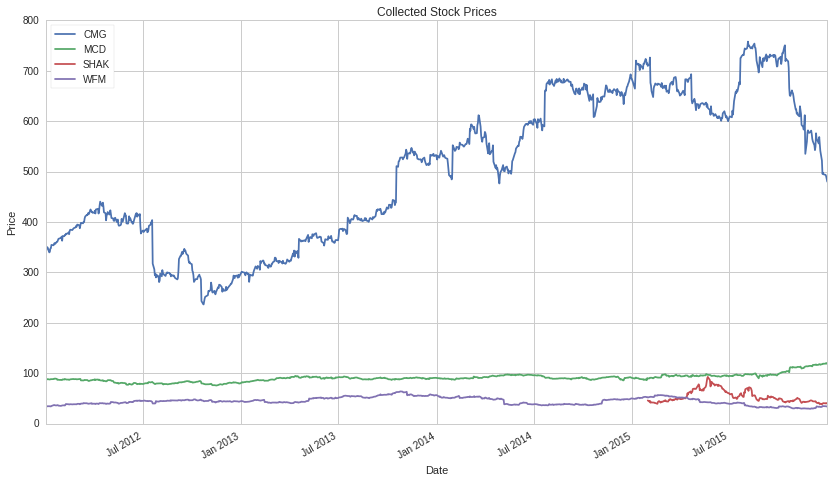

In [76]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

Las mismas funciones estadísticas de nuestras interacciones con `Serie` resurgen aquí con la adición del parámetro` axis`. Al especificar el "eje", le decimos a los pandas que calculen la función deseada a lo largo de las filas (`axis = 0`) o de las columnas (` axis = 1`). Podemos calcular fácilmente la media de cada columna así:

In [77]:
prices.mean(axis=0)

CMG     501.637439
MCD      90.433999
SHAK     53.530670
WFM      44.423044
dtype: float64

Además de la desviación estándar:

In [78]:
prices.std(axis=0)

CMG     146.697204
MCD       7.672937
SHAK     11.948689
WFM       7.550077
dtype: float64

Una vez más, la función `describe ()` nos proporcionará estadísticas de resumen de nuestros datos si preferimos tener todas nuestras estadísticas típicas en una visual conveniente en lugar de calcularlas individualmente.

In [79]:
prices.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,CMG,MCD,SHAK,WFM
count,1006.000000,1006.000000,233.000000,1006.000000
mean,501.637439,90.433999,53.530670,44.423044
std,146.697204,7.672937,11.948689,7.550077
min,236.240000,75.387000,38.205000,29.150000
25%,371.605000,86.798000,NaN,38.555250
50%,521.280000,90.062000,NaN,43.928000
75%,646.753750,93.976250,NaN,50.766000
max,757.770000,120.030000,92.470000,63.732000


Podemos escalar y agregar escalares a nuestro `DataFrame`, como podría sospechar después de tratar con` Series`. Esto funciona nuevamente en cuanto a los elementos.

In [80]:
(2 * prices - 50).head(5)

,CMG,MCD,SHAK,WFM
2012-01-03 00:00:00+00:00,631.960,123.262,NaN,15.576
2012-01-04 00:00:00+00:00,647.480,124.332,NaN,17.300
2012-01-05 00:00:00+00:00,649.980,125.052,NaN,18.514
2012-01-06 00:00:00+00:00,647.900,126.384,NaN,18.638
2012-01-09 00:00:00+00:00,629.044,124.684,NaN,18.646


Aquí usamos el método `pct_change ()` para obtener un `DataFrame` de los retornos multiplicativos de los valores que estamos viendo.

In [81]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

,CMG,MCD,SHAK,WFM
2012-01-04 00:00:00+00:00,0.022758,0.006176,NaN,0.026290
2012-01-05 00:00:00+00:00,0.003584,0.004130,NaN,0.018039
2012-01-06 00:00:00+00:00,-0.002972,0.007609,NaN,0.001810
2012-01-09 00:00:00+00:00,-0.027018,-0.009638,NaN,0.000117
2012-01-10 00:00:00+00:00,0.003470,0.000401,NaN,-0.002884


Si utilizamos nuestros métodos de estadísticas para estandarizar los retornos, un procedimiento común al examinar los datos, entonces podemos tener una mejor idea de cómo se mueven todos ellos en relación con el otro en la misma escala.

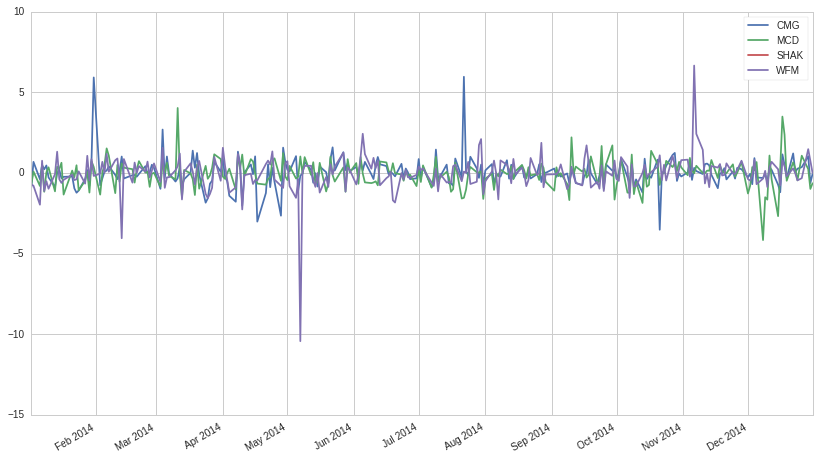

In [82]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

La media y la desviacion estándar también funcionan con `DataFrames`.

In [83]:
rolling_mean = pd.rolling_mean(prices, 30)
rolling_mean.columns = prices.columns

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=30,center=False).mean()
  """Entry point for launching an IPython kernel.


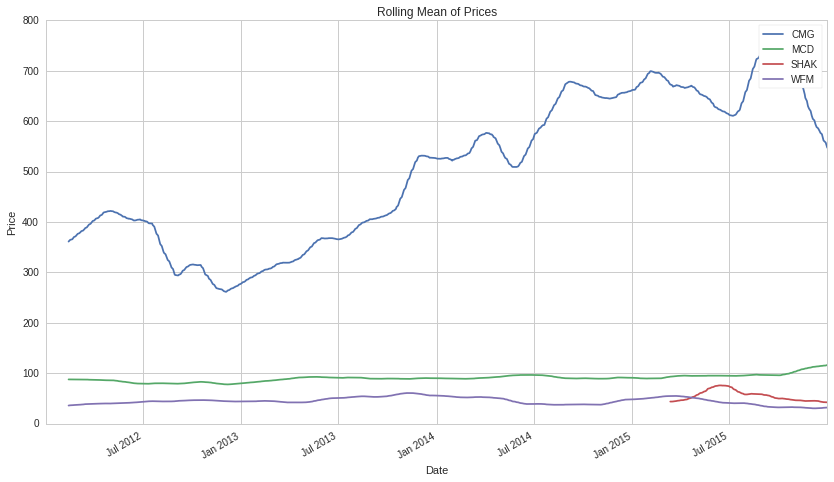

In [84]:
rolling_mean.plot()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();